# Dimensionality reduction using Principal Component Analysis (PCA)

In previous lectures you have seen that if the number of features is too large compared to the number of samples, predictive models can often result in overfitting and do not generalise well for unseen data.

Recall the example where we used multivariate linear regression to predict GA of a preterm baby. The model was fitted really well to the training data, but the cross-validation score was rather poor.

In [ ]:
# This code will download the required data files from GitHub
import requests
def download_data(source, dest):
    base_url = 'https://raw.githubusercontent.com/'
    owner = 'SirTurtle'
    repo = 'ML-BME-UofA-data'
    branch = 'main'
    url = '{}/{}/{}/{}/{}'.format(base_url, owner, repo, branch, source)
    r = requests.get(url)
    f = open(dest, 'wb')
    f.write(r.content)
    f.close()

# Create the temp directory, if it doesn't already exist
import os
if not os.path.exists('temp'):
   os.makedirs('temp')

download_data('Week-6-Feature-extraction-and-selection/data/GA-structure-volumes-preterm.csv', 'temp/GA-structure-volumes-preterm.csv')

In [ ]:
# Load data
import pandas as pd
import numpy as np

df = pd.read_csv("temp/GA-structure-volumes-preterm.csv",header=None)
structure_volumes = df.values
Features = structure_volumes[:,1:] # volumes - we have 86 features and 164 samples
Labels = structure_volumes[:,0] # GA - 164

# Multivariate linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

model = LinearRegression()
model.fit(Features,Labels)
R2_score = model.score(Features,Labels)
cv_score = cross_val_score(model, Features, Labels, cv=5).mean()

rmse = np.sqrt(-cross_val_score(model, Features, Labels, cv=5,scoring='neg_mean_squared_error').mean())
print("R2 score is {} and cross-validated R2 score is {}".format(round(R2_score,2), round(cv_score,2)))
print("Cross-validated root mean squared error is {} weeks GA".format(round(rmse,2)))

R2 score is 0.97 and cross-validated R2 score is 0.68
Cross-validated root mean squared error is 2.08 weeks GA


We have seen that the overfitting can be reduced and model performance improved by penalising the weights of the regression with ridge or lasso penalty.

Now we will now explore an alternative strategy - reducing dimension of the feature vector using principal component analysis.

__Task 1:__ Using the sklearn object ```PCA``` estimate and plot the cumulative distribution of ordered eigenvalues (or explained variance for each component).

*Hint:* a cumulative sum can be estimated using the ```np.cumsum()``` function.

***Note:*** The sklearn ```PCA``` function automatically orders components by eigenvalue (starting with the largest). This will not necessarily be true of the functions you build for yourself.

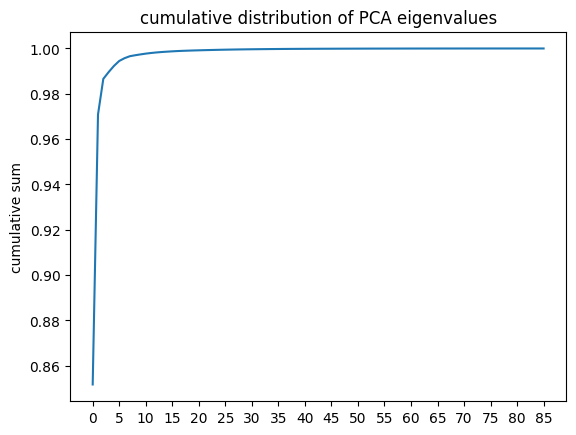

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

# Create the PCA model
pca = None

# Fit the data
pca.fit(None)
# Note that PCA is unsupervised - we use only Features for fitting!

# Estimate the cumulative distribution of the eigenvalues
# Here we use the .explained_variance_ratio_ attribute: it will show the result as a proportion of variance from 0-1
cumulative_sum = None

# Plot the distribution
plt.plot(cumulative_sum)
plt.xticks(np.arange(0,pca.explained_variance_ratio_.shape[0],5))
plt.title('cumulative distribution of PCA eigenvalues')
plt.ylabel('cumulative sum')
plt.ylabel('cumulative sum')
plt.show()

__Task 2:__ Now try to determine an appropriate cut off by also plotting lines parallel to the y-axis.
A good rule of thumb would be where it levels out: you can see after 10 eigenvalues the remaining dimensions have minimal contribution to variance and from 5-10 is very little. We are aiming to optimise the parameters of our model (here, the number of components) so as to get the best performance for our left out data estimated through cross validation.

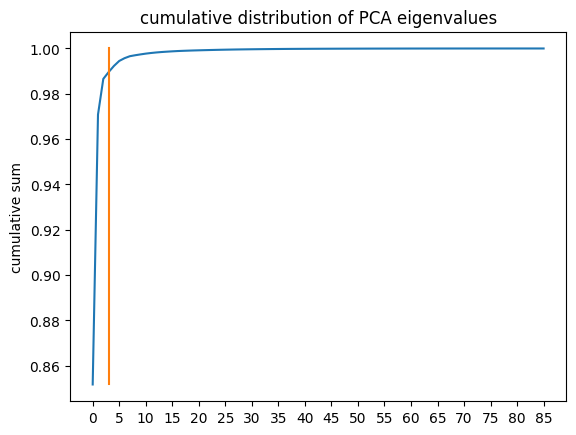

In [ ]:
# Re-plot the distribution
plt.plot(cumulative_sum)
plt.xticks(np.arange(0,pca.explained_variance_ratio_.shape[0],5))
plt.title('cumulative distribution of PCA eigenvalues')
plt.ylabel('cumulative sum')
plt.ylabel('cumulative sum')


# Now select lines parallel to the y-axis; play with different values of cutoff to determine a good one.
cutoff = None  #
x = np.ones(10)*cutoff
y = np.linspace(pca.explained_variance_ratio_[0],1,10)
plt.plot(x,y)
plt.show()

__Task 3__: Use these to determine an appropriate cutoff for PCA dimensionality reduction. Re-run PCA with this reduced set.

*Hint:* use parameter ```n_components```

In [ ]:
# Create the PCA model with number of components equal to the chosen cutoff
pca = PCA(None)

# Now fit the PCA
None

# Transform the original feature vectore to the reduced feature vector
newFeatures = pca.transform(Features) # Note you could use fit_transform to combine these two steps

# Check the size of the newFeatures
# We have moved from an 896 dimensional feaure space to just 3 dimensions
print('Size of original features: ', Features.shape)
print('Size of new features: ', newFeatures.shape)


Size of original features:  (164, 86)
Size of new features:  (164, 3)


__Task 4:__ Run the code below to perform linear regression on ```newFeatures``` and evaluate the performance. How does it compare to the linear regression using all 86 features?

In [ ]:
# Perform linear regression using the new features
model_new = LinearRegression()
model_new.fit(newFeatures,Labels)
R2_score_new = model_new.score(newFeatures,Labels)
cv_score_new = cross_val_score(model_new, newFeatures, Labels, cv=5).mean()
rmse_new = np.sqrt(-cross_val_score(model_new, newFeatures, Labels, cv=5, scoring='neg_mean_squared_error').mean())

print("New model R2 score is {} and cross-validated R2 score is {}".format(round(R2_score_new,2), round(cv_score_new,2)))
print("Cross-validated root mean squared error after using PCA is {} weeks GA".format(round(rmse_new,2)))

New model R2 score is 0.92 and cross-validated R2 score is 0.9
Cross-validated root mean squared error after using PCA is 1.22 weeks GA


We can see now that we get a better performance across our left out validation sets. This suggests that above a certain range, the components encode noise. The best cross validated performance is technically for 3 components but anything in between 3 and 10 components is okay.

We have obtained a very good result. Cross-validated RMSE is in a similar range as for penalised linear regression. We can therefore see that dimensionality reduction using PCA prevented the problem of overfitting.

__Task 5:__ Change the dimensionality of PCA to explore the impact on the result. You can repeat __Tasks 3__ and __4__ changing ```n_components``` to explore the model.